<a href="https://colab.research.google.com/github/DasagociCorpus/Pruebas/blob/main/TP1/Profesional_III_(2400015V)_Prueba_Transacciones_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **a. Supuestos**

**Normalidad de los Datos:** Se asume que los datos numéricos tienen una distribución cercana a la normalidad después de la estandarización.

**Representatividad de la Muestra:** La fracción del 30% del DataFrame original es representativa de la totalidad de los datos.

**Relevancia de las Variables:** Las variables seleccionadas para el análisis (numéricas y categóricas) son las más relevantes para la detección de anomalías.

**Consistencia de Anomalías:** Las anomalías en los datos se pueden detectar mediante técnicas de reducción de dimensionalidad y clustering no supervisado.



# **b. Marco Teórico**
**El análisis de componentes principales (PCA)** es el proceso mediante el cual se calculan los componentes principales de una matriz de datos con el objeto de realizar una comprensión de los datos. PCA es un enfoque no supervisado, lo que significa que se realiza en un conjunto de variables sin respuesta asociada. El PCA reduce la dimensionalidad del conjunto de datos, lo que permite explicar la mayor parte de la variabilidad utilizando menos variables, este es comúnmente utilziado como primera herramienta de visualización de los datos, para reducir el número de variables y evitar la multicolinealidad, o cuando se tienen demasiados predictores en relación con el número de observaciones. (https://magister-informatica-uach.github.io/INFO337_2023/lectures/8_PCA/PCA.html)

**Detección de Anomalías: **La detección de anomalías multivariante se refiere a la detección de anomalías en datos multidimensionales. Este tipo de detección de anomalías puede capturar patrones y relaciones más complejos en los datos que los enfoques de detección de anomalías univariantes. (https://konfuzio.com/es/deteccion-de-anomalias/)

Técnicas como Isolation Forest y DBSCAN se utilizan para este propósito:

**Isolation Forest: E**ste algoritmo de aprendizaje no supervisado se basa en la idea de aislar observaciones seleccionando aleatoriamente características y valores de división.

**DBSCAN:** Density-Based Spatial Clustering of Applications with Noise (DBSCAN) es un algoritmo de clustering que agrupa puntos que están densamente conectados y marca como anomalías aquellos que no pertenecen a ningún grupo.

# **c. Exploración y Tratamiento de Datos**

## **Importar librerías**

Importamos las bibliotecas necesarias para el análisis de datos, como pandas, numpy, matplotlib y las clases y funciones específicas de scikit-learn que utilizaremos para el modelamiento de datos.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import RandomizedSearchCV

## **Cargue de datos**

En primera instancia definen las variable que contiene la URL correspondiente a cada uno de las bases de datos, las cuales fueron cargadas y emportadas desde un archivo Sheets público que permita la lectura y manejo desde cualquier terminal.

Adicionalmente, importamos el dataframe de trasancciones (data) en formato string con el propósito de facilitar el proceso de normalización posterior.

In [ ]:
descripcion = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSeKjzSv2ka9vOyrlCo-ewdOpfCjLt69OOtOBxxoNffluv1R22Tlh5AfazxN5Xw5pA7OgY0th55dcY-/pub?gid=353177810&single=true&output=csv'
data = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSIMrk2BkctdLe0XBq_FJTeyVcWMkeOwA7Fddfkv8KICTQGn2RKKyXXuf1H-8s4syhsuFUhoQV3vNek/pub?gid=1262237482&single=true&output=csv'

In [ ]:
df0 = pd.read_csv(descripcion)
df = pd.read_csv(data, dtype=str)

## **Comprensión, Normalización y Análisis exploratorio de datos (EDA)**

Imprimimos df0 el cual corresponde al diccionario de la 46 variables que componene el dataframe (el cual llamaremos de ahora en adelante 'df'). Este último cuenta con "*los montos y cantidades transados por los clientes en un mes, agrupados por el producto en el que transa, el canal por el que opera, la naturaleza de la transacción y el medio transaccional. Así mismo, dispone de información sociodemográfica del cliente como edad, actividad económica, ocupación, jurisdicción de operación, entre otras variables*".

In [ ]:
df0

,Nombre,Descripción,Tipo
0,IdCliente,Llave única de Cliente,Numérico
1,PARTY_TYPE_DESC,Indica si es persona natural (individual) o ju...,Alfanumérico
2,PARTY_DATE_OF_BIRTH,Fecha Nacimiento/Constitución,Fecha
3,FECHA_EXPEDICION_DOCUMENTO,Fecha Expedición Documento,Fecha
4,CUSTOMER_SINCE_DATE,Fecha Vinculación Cliente,Fecha
5,GENDER_CODE,Género,Alfanumérico
6,INGRESOS_SAS,Ingresos Reportados,Numérico
7,STREET_STATE_NAME,Nombre Municipio Operación,Alfanumérico
8,STREET_STATE_CODE,Código Municipio Operación,Numérico
9,OCCUPATION_DESC,Ocupación,Alfanumérico


In [ ]:
df.head()

,IdCliente,PARTY_TYPE_DESC,PARTY_DATE_OF_BIRTH,FECHA_EXPEDICION_DOCUMENTO,CUSTOMER_SINCE_DATE,GENDER_CODE,INGRESOS_SAS,STREET_STATE_NAME,STREET_STATE_CODE,OCCUPATION_DESC,...,TOT_REDESCUENTOS,TOT_TRANSACH,TOT_DEPOSITOS,TOT_DESEMB,TOT_PAGO_CRED,TOT_PAGO_TC,TOT_RETIROS,TOT_PAGO_CREDITOS,TOT_INT_RECIBIDAS,TOT_INT_ENVIADAS
0,120,INDIVIDUAL,24APR01:00:00:00,03MAY19:00:00:00,02AUG22:00:00:00,M,1800000,DISTRITO CAPITAL,11001,EMPLEADO,...,0,577153.47,0,0,0,0,187000,0,0,0
1,184,INDIVIDUAL,11JUL01:00:00:00,11SEP19:00:00:00,26MAY22:00:00:00,F,800000,DISTRITO CAPITAL,11001,EMPLEADO,...,0,0,0,0,0,0,507000,0,0,0
2,198,INDIVIDUAL,14JAN01:00:00:00,23SEP19:00:00:00,12JAN23:00:00:00,M,1200000,CUNDINAMARCA,25754,EMPLEADO,...,0,0,0,0,0,0,0,0,0,0
3,431,INDIVIDUAL,10NOV01:00:00:00,26NOV19:00:00:00,25NOV20:00:00:00,M,1700000,DISTRITO CAPITAL,11001,EMPLEADO,...,0,0,0,0,0,0,0,0,0,0
4,597,INDIVIDUAL,19MAR01:00:00:00,08APR19:00:00:00,20MAY21:00:00:00,M,18000000,CUNDINAMARCA,25754,EMPLEADO,...,0,2283910,0,0,99000,0,2126550,99000,0,0


Tomamos las referencias las tipologías del diccionario para proceder a normalizar las varibles en tres categorías: fechas, categóricas y números.

Para la primera fase se crea un diccionario el cual contiene las variables numéricas. Aquí toma relevancia el hecho de importar en formato string ya que nos permitirá, a través de un for reemplazar carácteres especiales; para este caso comas por puntos y posteriormente convertir a float.

In [ ]:

numeric_cols = ['INGRESOS_SAS', 'TOT_TXN', 'NO_TXN', 'TOT_CR', 'CANT_CR', 'TOT_DB', 'CANT_DB', 'TOT_PD',
                'CANT_PD', 'TOT_CHE', 'CANT_CHE', 'TOT_EFE', 'CANT_EFE', 'TOT_ELE', 'CANT_ELE', 'TOT_CONS_FIJO',
                'TOT_CONS_ROT', 'TOT_CONS_VEHIC', 'TOT_CORR', 'TOT_AHO', 'TOT_REM', 'TOT_TC_COMECIAL',
                'TOT_TC_CONSUMO', 'TOT_VIVIENDA', 'TOT_DAVIPLATA', 'TOT_ORDINARIA', 'TOT_TRANSACH',
                'TOT_DEPOSITOS', 'TOT_DESEMB', 'TOT_PAGO_TC', 'TOT_RETIROS', 'TOT_PAGO_CREDITOS',
                'TOT_INT_RECIBIDAS', 'TOT_INT_ENVIADAS']

for col in numeric_cols:
    df[col] = df[col].str.replace(',', '.').astype(float)

Creamos los diccionarios correspondientes a los tres tipos de categorías y asignamos su Dtype correspondiente.

In [ ]:
# Fechas
date_columns = ['PARTY_DATE_OF_BIRTH', 'FECHA_EXPEDICION_DOCUMENTO', 'CUSTOMER_SINCE_DATE']
df[date_columns] = df[date_columns].apply(lambda x: pd.to_datetime(x, format='%d%b%y:%H:%M:%S'))

# Categorías
str_columns = ['IdCliente', 'PARTY_TYPE_DESC', 'GENDER_CODE', 'STREET_STATE_NAME', 'STREET_STATE_CODE',
               'OCCUPATION_DESC', 'INDUSTRY_CODE', 'PROFESION', 'ORIGEN_FONDOS']
df[str_columns] = df[str_columns].astype(str)

# Números
float_columns = ['INGRESOS_SAS', 'TOT_TXN', 'NO_TXN', 'TOT_CR', 'CANT_CR', 'TOT_DB', 'CANT_DB', 'TOT_PD',
                 'CANT_PD', 'TOT_CHE', 'CANT_CHE', 'TOT_EFE', 'CANT_EFE', 'TOT_ELE', 'CANT_ELE', 'TOT_CONS_FIJO',
                 'TOT_CONS_ROT', 'TOT_CONS_VEHIC', 'TOT_CORR', 'TOT_AHO', 'TOT_REM', 'TOT_TC_COMECIAL',
                 'TOT_TC_CONSUMO', 'TOT_VIVIENDA', 'TOT_DAVIPLATA', 'TOT_ORDINARIA', 'TOT_TRANSACH',
                 'TOT_DEPOSITOS', 'TOT_DESEMB', 'TOT_PAGO_TC', 'TOT_RETIROS', 'TOT_PAGO_CREDITOS',
                 'TOT_INT_RECIBIDAS', 'TOT_INT_ENVIADAS']
df[float_columns] = df[float_columns].astype(float)

Procedemos a realizar el EDA. En primera instancia traemos la información del dataframe a través de .info() e imprimios las primeras 20 filas con el fin de visualizar la correcta conversión de las variables.

In [ ]:
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72164 entries, 0 to 72163
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   IdCliente                   72164 non-null  object        
 1   PARTY_TYPE_DESC             72164 non-null  object        
 2   PARTY_DATE_OF_BIRTH         72164 non-null  datetime64[ns]
 3   FECHA_EXPEDICION_DOCUMENTO  72164 non-null  datetime64[ns]
 4   CUSTOMER_SINCE_DATE         72164 non-null  datetime64[ns]
 5   GENDER_CODE                 72164 non-null  object        
 6   INGRESOS_SAS                72164 non-null  float64       
 7   STREET_STATE_NAME           72164 non-null  object        
 8   STREET_STATE_CODE           72164 non-null  object        
 9   OCCUPATION_DESC             72164 non-null  object        
 10  INDUSTRY_CODE               72164 non-null  object        
 11  PROFESION                   72164 non-null  object    

,IdCliente,PARTY_TYPE_DESC,PARTY_DATE_OF_BIRTH,FECHA_EXPEDICION_DOCUMENTO,CUSTOMER_SINCE_DATE,GENDER_CODE,INGRESOS_SAS,STREET_STATE_NAME,STREET_STATE_CODE,OCCUPATION_DESC,...,TOT_REDESCUENTOS,TOT_TRANSACH,TOT_DEPOSITOS,TOT_DESEMB,TOT_PAGO_CRED,TOT_PAGO_TC,TOT_RETIROS,TOT_PAGO_CREDITOS,TOT_INT_RECIBIDAS,TOT_INT_ENVIADAS
0,120,INDIVIDUAL,2001-04-24,2019-05-03,2022-08-02,M,1800000.0,DISTRITO CAPITAL,11001,EMPLEADO,...,0,577153.47,0.0,0.0,0,0.0,187000.00,0.0,0.0,0.0
1,184,INDIVIDUAL,2001-07-11,2019-09-11,2022-05-26,F,800000.0,DISTRITO CAPITAL,11001,EMPLEADO,...,0,0.00,0.0,0.0,0,0.0,507000.00,0.0,0.0,0.0
2,198,INDIVIDUAL,2001-01-14,2019-09-23,2023-01-12,M,1200000.0,CUNDINAMARCA,25754,EMPLEADO,...,0,0.00,0.0,0.0,0,0.0,0.00,0.0,0.0,0.0
3,431,INDIVIDUAL,2001-11-10,2019-11-26,2020-11-25,M,1700000.0,DISTRITO CAPITAL,11001,EMPLEADO,...,0,0.00,0.0,0.0,0,0.0,0.00,0.0,0.0,0.0
4,597,INDIVIDUAL,2001-03-19,2019-04-08,2021-05-20,M,18000000.0,CUNDINAMARCA,25754,EMPLEADO,...,0,2283910.00,0.0,0.0,99000,0.0,2126550.00,99000.0,0.0,0.0
5,756,INDIVIDUAL,2000-07-19,2018-08-01,2019-01-18,F,1830000.0,DISTRITO CAPITAL,11001,INDEPENDIENTE,...,0,0.00,0.0,0.0,0,0.0,0.00,0.0,0.0,0.0
6,762,INDIVIDUAL,1994-07-01,2012-10-10,2016-05-06,M,644350.0,DISTRITO CAPITAL,11001,EMPLEADO,...,0,0.00,0.0,0.0,0,0.0,0.00,0.0,0.0,0.0
7,769,INDIVIDUAL,1999-11-09,2017-11-14,2022-06-29,F,1100000.0,AMAZONAS,91405,EMPLEADO,...,0,0.00,0.0,0.0,0,0.0,0.00,0.0,0.0,0.0
8,923,INDIVIDUAL,2001-01-20,2019-02-12,2020-04-16,F,1000000.0,DISTRITO CAPITAL,11001,EMPLEADO,...,0,0.00,0.0,0.0,0,0.0,800000.00,0.0,0.0,0.0
9,1049,INDIVIDUAL,2002-05-13,2020-08-25,2020-11-10,M,1000000.0,DISTRITO CAPITAL,11001,ESTUDIANTE,...,0,0.00,0.0,0.0,0,0.0,123277.00,0.0,0.0,0.0


Verificamos que no existan nulos o duplicados, en caso de su existencia, procedemos a eliminalos con el fin de depurar la información y garantizar su eficiencia.

In [ ]:
# Calcular el número de valores nulos por columna
Nulls = df.isna().sum()
print("Valores nulos por columna:")
print(Nulls)

# Agregar filas duplicadas al DataFrame
duplicadas = df.duplicated().sum()
print("Número de filas duplicadas:", duplicadas)


Valores nulos por columna:
IdCliente                     0
PARTY_TYPE_DESC               0
PARTY_DATE_OF_BIRTH           0
FECHA_EXPEDICION_DOCUMENTO    0
CUSTOMER_SINCE_DATE           0
GENDER_CODE                   0
INGRESOS_SAS                  0
STREET_STATE_NAME             0
STREET_STATE_CODE             0
OCCUPATION_DESC               0
INDUSTRY_CODE                 0
PROFESION                     0
ORIGEN_FONDOS                 0
TOT_TXN                       0
NO_TXN                        0
TOT_CR                        0
CANT_CR                       0
TOT_DB                        0
CANT_DB                       0
TOT_PD                        0
CANT_PD                       0
TOT_CHE                       0
CANT_CHE                      0
TOT_EFE                       0
CANT_EFE                      0
TOT_ELE                       0
CANT_ELE                      0
TOT_IND                       0
CANT_IND                      0
TOT_CONS_FIJO                 0
TOT_CONS_ROT 

Generamos un análisis descriptivo del df de formma transpuesta con el fin de observar las cantidades, media, mínimos, los percentiles y la desviación estandar de cada variable numérica.

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
PARTY_DATE_OF_BIRTH,72164,2003-04-24 16:40:50.418491264,1969-01-01 00:00:00,1982-06-03 00:00:00,1991-10-01 00:00:00,2004-11-05 00:00:00,2068-12-31 00:00:00,NaN
FECHA_EXPEDICION_DOCUMENTO,72164,2003-08-29 05:11:03.089629184,1969-01-01 00:00:00,1991-09-11 18:00:00,2003-05-19 00:00:00,2012-05-03 00:00:00,2068-12-30 00:00:00,NaN
CUSTOMER_SINCE_DATE,72164,2013-08-27 08:13:52.503741696,1969-06-01 00:00:00,2008-04-08 00:00:00,2016-09-01 00:00:00,2020-05-07 00:00:00,2068-03-01 00:00:00,NaN
INGRESOS_SAS,72164.0,6402084211438837.0,0.0,1000000.0,2037332.0,4785858.0,462000000000000000000.0,1719814778821840128.0
TOT_TXN,72164.0,268832131301317.375,0.0,0.07,146539.72,3414430.5925,19400000000000000000.0,72217330539183824.0
NO_TXN,72164.0,12.700224,0.0,1.0,2.0,13.0,6395.0,38.58096
TOT_CR,72164.0,29024231.425997,0.0,0.03,1072.36,1731715.965,990048113182.0,4023182288.497794
CANT_CR,72164.0,3.633876,0.0,1.0,1.0,3.0,6097.0,25.266546
TOT_DB,72164.0,24446543.171369,0.0,0.0,0.0,1597485.35,945388600000.0,3822818291.068986
CANT_DB,72164.0,8.978105,0.0,0.0,0.0,9.0,2280.0,22.873154


### **Muestreo del DataFrame y selección de variables:**
Tomamos una fracción del DataFrame original con el fin de generar una eficiencia en el proceso de análisis. Posteriormente, seleccionamos las columnas numéricas y categóricas para el preprocesamiento de datos el modelo.

In [ ]:
df_sample = df.sample(frac=0.3, random_state=42)

variables_categoricas = df_sample.select_dtypes(include=['object']).columns
variables_numericas = df_sample.select_dtypes(include=['float64', 'int64']).columns

### **Preprocesamiento (escalamiento y codificación de variables):**
Teniendo en cuenta las diferentes dispersiones por variable, creamos un preprocesador utilizando ColumnTransformer para escalar las variables numéricas y codificar las variables categóricas.

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), variables_numericas),
        ('cat', OneHotEncoder(sparse=False), variables_categoricas)
    ]
)

### **Pipeline de preprocesamiento y PCA:**

Configuramos un pipeline que incluye el preprocesador definido anteriormente y la reducción de dimensionalidad utilizando PCA con 2 componentes principales y lo aplicamos al df de muestra para realizar el preprocesamiento y la reducción de dimensionalidad simultáneamente.

Es importante resaltar que:

> la detección de anomalías (outliers) con Análisis de Componentes Principales (PCA) es una estrategia no supervisada para **identificar anomalías cuando los datos no están etiquetados**, es decir, no se conoce la clasificación real (anomalía - no anomalía) de las observaciones. (https://cienciadedatos.net/documentos/py21-deteccion-anomalias-pca-python.html)





In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2))
])

X_pca = pipeline.fit_transform(df_sample)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### **Algoritmo Isolation Forest**

Utilizamos Algoritmo Isolation Forest para detectar anomalías en los datos transformados por PCA.

> El Algoritmo IsolationForest devuelve la puntuación de anomalía de cada muestra utilizando el algoritmo IsolationForest el cual 'aísla' las observaciones seleccionando aleatoriamente una característica y luego seleccionando aleatoriamente un valor dividido entre los valores máximo y mínimo de la característica seleccionada. (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)


In [ ]:
iso_forest = IsolationForest(contamination=0.1, random_state=42)

anomalias = iso_forest.fit_predict(X_pca)

### **Generación de etiquetas**
Etiquetamos  como anormal (anomalia=-1) y normal (anomalia=1), en función de la predicción de Isolation Forest.

In [ ]:
etiquetas_anomalias = np.where(anomalias == -1, 'anomalia', 'normal')

Se crea un DataFrame df_pca con las componentes principales (PC1 y PC2) obtenidas del PCA y las etiquetas de anomalías (anomalia), realizamos una previsualización de las primeras n filas con .head() y generamos una visualización de dispersión (scatter plot) de las componentes principales que nos permita observar cómo se distribuyen las anomalías en relación con las componentes principales.

         PC1       PC2 anomalia
0  -0.554803  0.457715   normal
1  -0.525825  0.459237   normal
2  -0.533887  0.441528   normal
3  -0.539923  0.432625   normal
4  -0.367531  0.133411   normal
5  -0.523821  0.452152   normal
6   0.083765 -0.287178   normal
7  -0.097738  0.123188   normal
8  -0.551817  0.473692   normal
9  -0.141031  0.137301   normal
10 -0.220868  0.198189   normal
11 -0.553865  0.462642   normal
12 -0.547140  0.477787   normal
13  1.045874 -0.788293   normal
14 -0.554801  0.457714   normal
15 -0.492081  0.414732   normal
16 -0.518595  0.414937   normal
17 -0.546961  0.478155   normal
18  0.612965 -0.539160   normal
19 -0.017442  0.026731   normal


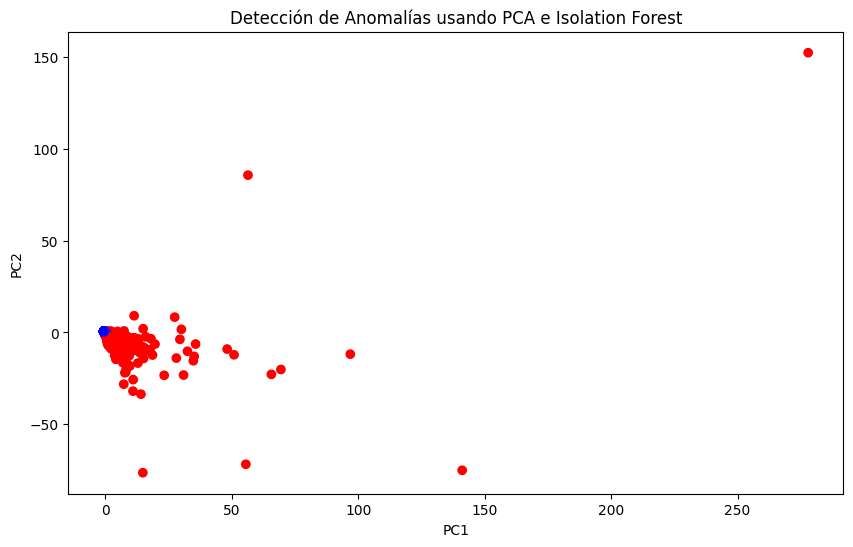

In [ ]:
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['anomalia'] = etiquetas_anomalias
print(df_pca.head(20))

plt.figure(figsize=(10, 6))
colors = {'normal': 'blue', 'anomalia': 'red'}
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['anomalia'].map(colors))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Detección de Anomalías usando PCA e Isolation Forest')
plt.show()

Se utiliza el método del codo para determinar un valor apropiado de 'eps' (la distancia máxima entre dos muestras para que una se considere cercana a la otra) para el algoritmo DBSCAN. (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

En este se calcula la distancia al quinto vecino más cercano para cada punto en el espacio de las componentes principales y se grafica. Se identifica el punto de inflexión en la curva como una estimación del valor óptimo de 'eps'.

In [ ]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_pca[['PC1', 'PC2']])
distancias, _ = neighbors_fit.kneighbors(df_pca[['PC1', 'PC2']])
distancias = np.sort(distancias[:, 4], axis=0)

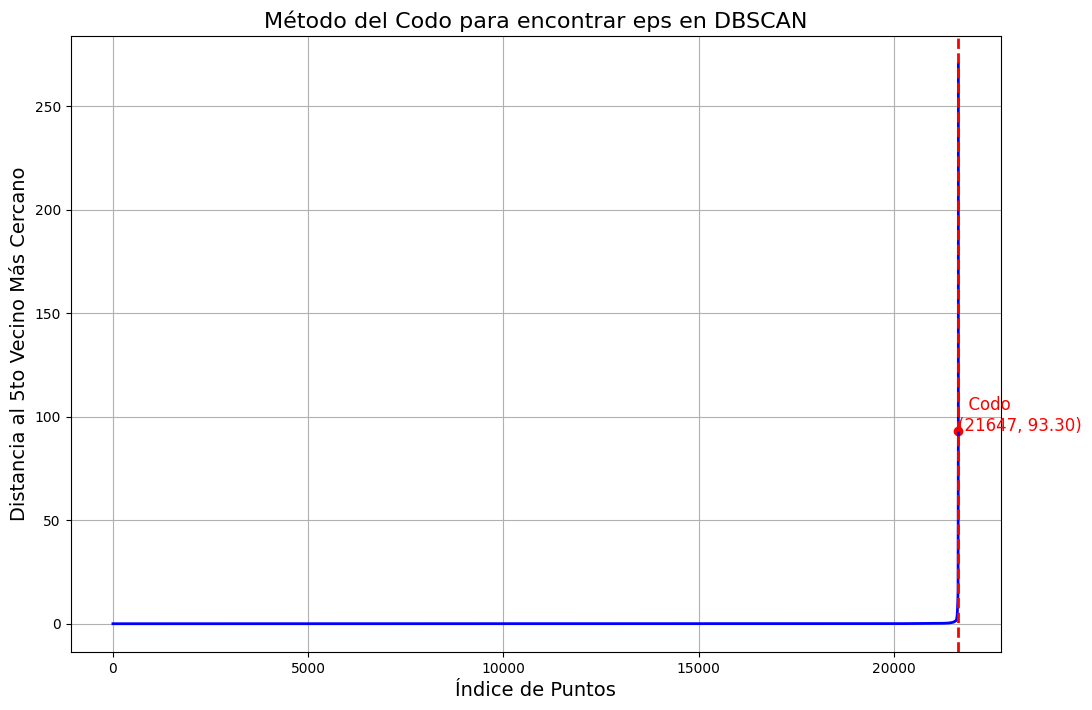

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(distancias, color='b', linestyle='-', linewidth=2)
plt.title('Método del Codo para encontrar eps en DBSCAN', fontsize=16)
plt.xlabel('Índice de Puntos', fontsize=14)
plt.ylabel('Distancia al 5to Vecino Más Cercano', fontsize=14)
plt.grid(True)

codo_index = np.argmax(np.diff(distancias))
plt.axvline(x=codo_index, color='r', linestyle='--', linewidth=2)
plt.scatter(codo_index, distancias[codo_index], color='red')
plt.text(codo_index, distancias[codo_index] + 0.01, f'  Codo\n({codo_index}, {distancias[codo_index]:.2f})',
         color='red', fontsize=12)
plt.show()

In [ ]:
# Optimización de eps usando el coeficiente de silueta
eps_values = np.arange(0.1, 0.6, 0.1)
silhouette_scores = [(eps, silhouette_score(df_pca[['PC1', 'PC2']],
                                            DBSCAN(eps=eps, min_samples=5).fit_predict(df_pca[['PC1', 'PC2']])))
 for eps in eps_values]

for eps, score in silhouette_scores:
    print(f"eps: {eps}, Silhouette Score: {score}")

optimal_eps = max(silhouette_scores, key=lambda x: x[1])[0]
print(f"El valor óptimo de eps es: {optimal_eps}")

eps: 0.1, Silhouette Score: 0.3624850399476662
eps: 0.2, Silhouette Score: 0.6076420215289785
eps: 0.30000000000000004, Silhouette Score: 0.8134485289686059
eps: 0.4, Silhouette Score: 0.6961961416070419
eps: 0.5, Silhouette Score: 0.8732852650543549
El valor óptimo de eps es: 0.5


In [ ]:
# Aplicar DBSCAN con el valor óptimo de eps
dbscan_optimal = DBSCAN(eps=optimal_eps, min_samples=5)
df_pca['predicted_label'] = dbscan_optimal.fit_predict(df_pca[['PC1', 'PC2']])
df_pca['predicted_label'] = np.where(df_pca['predicted_label'] == -1, 'anomalia', 'normal')

### **Visualización y análisis de los resultados**

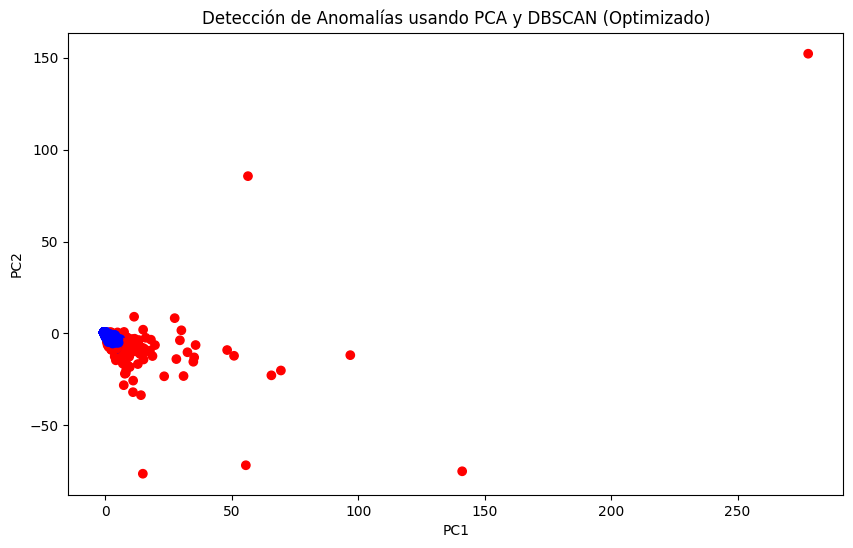

Distribución Var Anomalía:
anomalia
normal      19486
anomalia     2163
Name: count, dtype: int64 anomalia
normal      90.008776
anomalia     9.991224
Name: count, dtype: float64


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['predicted_label'].map(colors))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Detección de Anomalías usando PCA y DBSCAN (Optimizado)')
plt.show()

# Análisis de las etiquetas resultantes
conteo_etiquetas = df_pca['anomalia'].value_counts()
porcentaje_etiquetas = conteo_etiquetas / len(df_pca) * 100
print("Distribución Var Anomalía:")
print(conteo_etiquetas, porcentaje_etiquetas)

# **d. Modelos o Metodologías Utilizadas:**
Pipeline de Preprocesamiento y PCA, Isolation Forest y DBSCAN.


# **e. Elección del Mejor Modelo/Metodología y los Criterios de su Selección**

El modelo elegido se sostiene bajo dos aristas fundamentales: Eficiencia e Interpretabilidad. Para este csao, la combinación de PCA con Isolation Forest y DBSCAN representa una forma computacionalmente eficiente para procesamiento de datos robustos. Adicionalmente, la reducción de dimensionalidad a través de PCA facilita la visualización e interpretación de los resultados. De esta manera, se logra una precisión en la detección de anomalías sin sacrificar rendimiento.


# **f. Conclusiones y Recomendaciones para el Trabajo Futuro**


**Conclusiones**

La distribución resultante de anomalías, el modelo de detección de anomalías ha sido capaz de identificar con éxito una proporción significativa de observaciones "normales", representando el 90.01% del total de registros, mientras que detectó un 9.99% de "anomalías". Este balance entre las clasificaciones sugiere que el modelo posee una capacidad razonable para discriminar entre los patrones "normales" y los "anómalos" en los datos.


**Recomendaciones**

**Ajuste Fino de Parámetros:** Realizar un ajuste fino adicional de parámetros tanto para Isolation Forest como para DBSCAN podría mejorar aún más la precisión en la detección de anomalías.

**Implementación de Métodos alternos:** Explorar la integración de otros métodos de detección de anomalías, como Local Outlier Factor (LOF) o Autoencoders, para comparar y potencialmente mejorar la detección de anomalías.

**Automatización del Pipeline:** Desarrollar un pipeline automatizado que integre todos los pasos de preprocesamiento, reducción de dimensionalidad y detección de anomalías para facilitar el análisis en tiempo real.

**Monitoreo Continuo:** Implementar un sistema de monitoreo continuo para detectar anomalías en tiempo real, permitiendo una respuesta rápida y adecuada ante eventos anómalos, especialmente en el proceso de detección de fraude transaccional.




## **Información de Sistema**

In [ ]:
!pip install sinfo
from sinfo import sinfo
sinfo()

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 3.8 MB/s eta 0:00:00
  Created wheel for sinfo: filename=sinfo-0.3.4-py3-none-any.whl size=7880 sha256=2bb36d2a59271e2546e3e90080a89e272f03e5865ae54105c648f630924a936a
  Stored in directory: /root/.cache/pip/wheels/ae/fe/9d/eb4b47396d5c94b8ad82a5aa9f905c56c981deb4e532329f72
Successfully built sinfo
The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
matplotlib  3.7.1
numpy       1.25.2
pandas      2.0.3
sinfo       0.3.4
sklearn     1.2.2
-----
IPython     